In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
dataset=pd.read_csv("balanced_dataset.csv")

In [3]:
dataset

,app_name,response_time,error_rate,cpu_usage,memory_usage,disk_space,active_users,downtime
0,NIP,18,22,28,38,48,8000,1
1,NIP,14,41,24,34,44,4000,0
2,NIP,17,38,27,37,47,7000,0
3,NIP,15,97,25,35,45,5000,0
4,NIP,11,67,21,31,41,1000,0
...,...,...,...,...,...,...,...,...
1815,NIP,22,48,32,42,52,12000,1
1816,NIP,18,82,28,38,48,8000,1
1817,NIP,17,97,27,37,47,7000,0
1818,NIP,18,53,28,38,48,8000,1


## Finding null values and replacing them

In [4]:
dataset.isnull().sum()

app_name         0
response_time    0
error_rate       0
cpu_usage        0
memory_usage     0
disk_space       0
active_users     0
downtime         0
dtype: int64

## Finding the information about the dataset (dtype) object or integer that column contains

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1820 entries, 0 to 1819
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   app_name       1820 non-null   object
 1   response_time  1820 non-null   int64 
 2   error_rate     1820 non-null   int64 
 3   cpu_usage      1820 non-null   int64 
 4   memory_usage   1820 non-null   int64 
 5   disk_space     1820 non-null   int64 
 6   active_users   1820 non-null   int64 
 7   downtime       1820 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 113.9+ KB


## Dataset shape for downtime and incident_duration

In [6]:
dataset['downtime'].value_counts()

downtime
0    1000
1     820
Name: count, dtype: int64

## seperating the quan and qual

In [7]:
def quanQual(dataset):
    quan=[]
    qual=[]
    for columnName in dataset.columns:
        print(columnName)
        if(dataset[columnName].dtype=='object'):
            print("qual")
            qual.append(columnName)
        else:
            print("quan")
            quan.append(columnName)
    return quan,qual

In [8]:
quan,qual=quanQual(dataset)

app_name
qual
response_time
quan
error_rate
quan
cpu_usage
quan
memory_usage
quan
disk_space
quan
active_users
quan
downtime
quan


In [9]:
quan

['response_time',
 'error_rate',
 'cpu_usage',
 'memory_usage',
 'disk_space',
 'active_users',
 'downtime']

In [10]:
qual

['app_name']

## Basic information of dataset by Dataframe to view

In [11]:
dataset.describe()

,response_time,error_rate,cpu_usage,memory_usage,disk_space,active_users,downtime
count,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000
mean,16.114286,50.825275,26.114286,36.114286,46.114286,6114.285714,0.450549
std,3.663426,29.235414,3.663426,3.663426,3.663426,3663.425502,0.497685
min,10.000000,1.000000,20.000000,30.000000,40.000000,0.000000,0.000000
25%,14.000000,25.000000,24.000000,34.000000,44.000000,4000.000000,0.000000
50%,16.000000,51.000000,26.000000,36.000000,46.000000,6000.000000,0.000000
75%,18.000000,77.000000,28.000000,38.000000,48.000000,8000.000000,1.000000
max,22.000000,100.000000,32.000000,42.000000,52.000000,12000.000000,1.000000


## Measure of central tendency, quartile, 1.5 rule, minimum, maximum

In [12]:
descriptive = pd.DataFrame(index=["mean", "median", "mode", "Q1:25%", "Q2:50%", "Q3:75%", "Q4:100%",
                                  "IQR", "1.5rule", "Lesser", "Greater", "Min", "Max"], columns=quan)

for columnName in quan:
    descriptive.loc["mean", columnName] = dataset[columnName].mean()
    descriptive.loc["median", columnName] = dataset[columnName].median()
    descriptive.loc["mode", columnName] = dataset[columnName].mode()[0]
    descriptive.loc["Q1:25%", columnName] = dataset.describe()[columnName]["25%"]
    descriptive.loc["Q2:50%", columnName] = dataset.describe()[columnName]["50%"]
    descriptive.loc["Q3:75%", columnName] = dataset.describe()[columnName]["75%"]
    descriptive.loc["Q4:100%", columnName] = dataset.describe()[columnName]["max"]
    descriptive.loc["IQR", columnName] = descriptive.loc["Q3:75%", columnName] - descriptive.loc["Q1:25%", columnName]
    descriptive.loc["1.5rule", columnName] = 1.5 * descriptive.loc["IQR", columnName]
    descriptive.loc["Lesser", columnName] = descriptive.loc["Q1:25%", columnName] - descriptive.loc["1.5rule", columnName]
    descriptive.loc["Greater", columnName] = descriptive.loc["Q3:75%", columnName] + descriptive.loc["1.5rule", columnName]
    descriptive.loc["Min", columnName] = dataset[columnName].min()
    descriptive.loc["Max", columnName] = dataset[columnName].max()


In [13]:
descriptive

,response_time,error_rate,cpu_usage,memory_usage,disk_space,active_users,downtime
mean,16.114286,50.825275,26.114286,36.114286,46.114286,6114.285714,0.450549
median,16.0,51.0,26.0,36.0,46.0,6000.0,0.0
mode,14,2,24,34,44,4000,0
Q1:25%,14.0,25.0,24.0,34.0,44.0,4000.0,0.0
Q2:50%,16.0,51.0,26.0,36.0,46.0,6000.0,0.0
Q3:75%,18.0,77.0,28.0,38.0,48.0,8000.0,1.0
Q4:100%,22.0,100.0,32.0,42.0,52.0,12000.0,1.0
IQR,4.0,52.0,4.0,4.0,4.0,4000.0,1.0
1.5rule,6.0,78.0,6.0,6.0,6.0,6000.0,1.5
Lesser,8.0,-53.0,18.0,28.0,38.0,-2000.0,-1.5


## Finding outliers

In [14]:
lesser=[]
greater=[]

for columnName in quan:
    if(descriptive[columnName]["Min"]<descriptive[columnName]["Lesser"]):
        lesser.append(columnName)
    if(descriptive[columnName]["Max"]>descriptive[columnName]["Greater"]):
        greater.append(columnName)

In [15]:
print("Lesser:", lesser)
print("Greater:", greater)

Lesser: []
Greater: []


## If any outliers are formed to replacing the outliers

In [16]:
for columnName in lesser:
    dataset[columnName][dataset[columnName]<descriptive[columnName]["Lesser"]]=descriptive[columnName]["Lesser"]
for columnName in greater:
    dataset[columnName][dataset[columnName]>descriptive[columnName]["Greater"]]=descriptive[columnName]["Greater"]


In [17]:
lesser

[]

In [18]:
greater

[]

## FREQUENCY

In [19]:
freqTable=pd.DataFrame(columns=["unique_values","Frequency","Relative_frequency","Cumsum"])
freqTable

,unique_values,Frequency,Relative_frequency,Cumsum


In [20]:
def freqTable(columnName,dataset):
    freqTable=pd.DataFrame(columns=["unique_values","Frequency","Relative_frequency","Cumsum"])
    freqTable["unique_values"]=dataset[columnName].value_counts().index
    freqTable["Frequency"]=dataset[columnName].value_counts().values
    freqTable["Relative_frequency"]=(freqTable["Frequency"]/103)
    freqTable["Cumsum"]=freqTable["Relative_frequency"].cumsum()
    return freqTable

In [21]:
freqTable("active_users",dataset)

,unique_values,Frequency,Relative_frequency,Cumsum
0,4000,363,3.524272,3.524272
1,8000,348,3.378641,6.902913
2,12000,191,1.854369,8.757282
3,0,165,1.601942,10.359223
4,11000,95,0.922330,11.281553
5,5000,93,0.902913,12.184466
6,1000,91,0.883495,13.067961
7,10000,88,0.854369,13.922330
8,7000,86,0.834951,14.757282
9,9000,77,0.747573,15.504854


## skewness, kurtosis, variance and standard deviation

In [22]:
def Univariate(dataset, quan):
    descriptive = pd.DataFrame(index=["mean", "median", "mode", "Q1:25%", "Q2:50%", "Q3:75%", "Q4:100%",
                                      "IQR", "1.5rule", "Lesser", "Greater", "Min", "Max", "skew", 
                                      "kurtosis", "var", "Std"], columns=quan)
    for columnName in quan:
        descriptive.loc["mean", columnName] = dataset[columnName].mean()
        descriptive.loc["median", columnName] = dataset[columnName].median()
        descriptive.loc["mode", columnName] = dataset[columnName].mode()[0]
        descriptive.loc["Q1:25%", columnName] = dataset.describe()[columnName]["25%"]
        descriptive.loc["Q2:50%", columnName] = dataset.describe()[columnName]["50%"]
        descriptive.loc["Q3:75%", columnName] = dataset.describe()[columnName]["75%"]
        descriptive.loc["Q4:100%", columnName] = dataset.describe()[columnName]["max"]
        descriptive.loc["IQR", columnName] = descriptive.loc["Q3:75%", columnName] - descriptive.loc["Q1:25%", columnName]
        descriptive.loc["1.5rule", columnName] = 1.5 * descriptive.loc["IQR", columnName]
        descriptive.loc["Lesser", columnName] = descriptive.loc["Q1:25%", columnName] - descriptive.loc["1.5rule", columnName]
        descriptive.loc["Greater", columnName] = descriptive.loc["Q3:75%", columnName] + descriptive.loc["1.5rule", columnName]
        descriptive.loc["Min", columnName] = dataset[columnName].min()
        descriptive.loc["Max", columnName] = dataset[columnName].max()
        descriptive.loc["skew", columnName] = dataset[columnName].skew()
        descriptive.loc["kurtosis", columnName] = dataset[columnName].kurtosis()
        descriptive.loc["var", columnName] = dataset[columnName].var()
        descriptive.loc["Std", columnName] = dataset[columnName].std()
    
    return descriptive


In [23]:
Univariate(dataset,quan)

,response_time,error_rate,cpu_usage,memory_usage,disk_space,active_users,downtime
mean,16.114286,50.825275,26.114286,36.114286,46.114286,6114.285714,0.450549
median,16.0,51.0,26.0,36.0,46.0,6000.0,0.0
mode,14,2,24,34,44,4000,0
Q1:25%,14.0,25.0,24.0,34.0,44.0,4000.0,0.0
Q2:50%,16.0,51.0,26.0,36.0,46.0,6000.0,0.0
Q3:75%,18.0,77.0,28.0,38.0,48.0,8000.0,1.0
Q4:100%,22.0,100.0,32.0,42.0,52.0,12000.0,1.0
IQR,4.0,52.0,4.0,4.0,4.0,4000.0,1.0
1.5rule,6.0,78.0,6.0,6.0,6.0,6000.0,1.5
Lesser,8.0,-53.0,18.0,28.0,38.0,-2000.0,-1.5


## To view the density of active_users

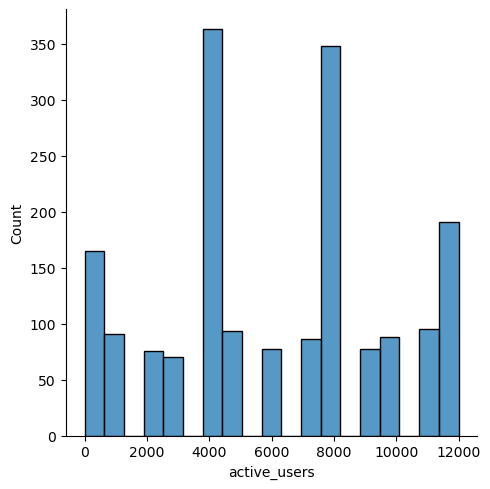

In [24]:
sns.displot(dataset["active_users"])

## probability of desired range(mean and standard deviation)

In [25]:
def get_pdf_probability(dataset, startrange, endrange):
    from matplotlib import pyplot
    from scipy.stats import norm
    import seaborn as sns
    
    # Plot histogram with KDE
    ax = sns.histplot(dataset, kde=True, line_kws={'color': 'blue'}, color='Green')
    pyplot.axvline(startrange, color='Red')
    pyplot.axvline(endrange, color='Red')
    
    # Generate a sample
    sample = dataset
    # Calculate parameters
    sample_mean = sample.mean()
    sample_std = sample.std()
    print('Mean=%.3f, Standard Deviation=%.3f' % (sample_mean, sample_std))
    
    # Define the distribution
    dist = norm(sample_mean, sample_std)
    # Sample probabilities for a range of outcomes
    values = [value for value in range(startrange, endrange)]
    probabilities = [dist.pdf(value) for value in values]
    prob = sum(probabilities)
    print("The area between range({}, {}): {}".format(startrange, endrange, prob))
    return prob


Mean=6114.286, Standard Deviation=3663.426
The area between range(7500, 10000): 0.20822155212719295


0.20822155212719295

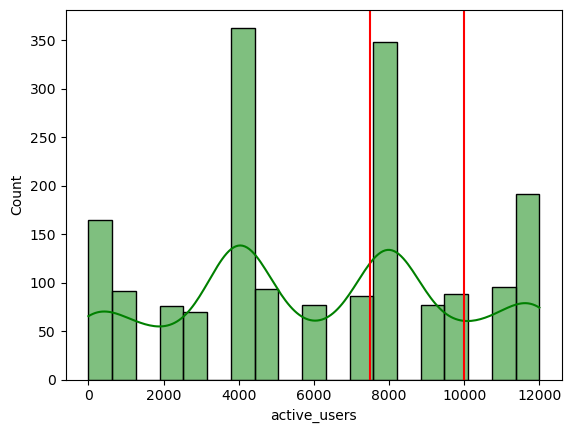

In [26]:
get_pdf_probability(dataset["active_users"],7500,10000)